<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-2/blob/main/RESULTADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo IA en la comunidad de La Rioja, equipo 2
Dataset: https://unirioja-my.sharepoint.com/:u:/g/personal/joheras_unirioja_es/EbmPj-gacuJMrllR3FsP1IcBSvAh5dDfD7VdZQDkyWjMNA?e=qAKxPT 

##Librerías utilizadas


In [1]:
!pip install pymupdf             #Para el conversor de PDF a Imagen
import fitz                      #Para el conversor de PDF a Imagen
import cv2                       #Para tratamiento de imagenes
import matplotlib.pyplot as plt  #Para mostrar las imagenes
import imutils                   #Para alinear imágenes
import numpy as np               

     |████████████████████████████████| 6.4MB 5.2MB/s 


##Función mostrar imagen


In [3]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.figure(figsize = (200,20))
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.figure(figsize = (180,18))
        plt.imshow(img2,cmap='gray')
        plt.show()

##Conversor de PDF a Imagen

In [4]:
#La función recibe tres strings, convierte el fichero x.pdf en dos imágenes x_0.png y x_1.png (Una por cada página)
def conversorPDF_PNG(nombreFichero, pathOrigen, pathDestino):
  doc = fitz.open(pathOrigen+nombreFichero)
  for pg in range(doc.pageCount):
        page = doc[pg]
        rotate = int(0)
            # El factor de escala para cada tamaño es 2, lo que generará una imagen con cuatro veces la resolución para nosotros.
        zoom_x = 2.0
        zoom_y = 2.0
        trans = fitz.Matrix(zoom_x, zoom_y).preRotate(rotate)
        pm = page.getPixmap(matrix=trans, alpha=False)
        nombreFichero=nombreFichero.split('.')[0]
        name = nombreFichero+"_"+str(pg)+".png"
        pm.writePNG(pathDestino+name)


##Función para alinear imágenes

In [5]:
def alinea_imagenes(imagen1,template,maxFeatures=500,keepPercent=0.2,debug=False):
  imageGray=cv2.cvtColor(imagen1,cv2.COLOR_BGR2GRAY)
  templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

  orb=cv2.ORB_create(maxFeatures)
  (kpsA,descsA)=orb.detectAndCompute(imageGray,None)
  (kpsB,descsB)=orb.detectAndCompute(templateGray,None)

  method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
  matcher = cv2.DescriptorMatcher_create(method)
  matches = matcher.match(descsA, descsB, None)

  matches = sorted(matches, key=lambda x:x.distance)
  keep = int(len(matches) * keepPercent)
  matches = matches[:keep]

  if debug:
    matchedVis=cv2.drawMatches(imagen1,kpsA,template,kpsB,matches,None)
    matchedVis= imutils.resize(matchedVis,width=1000)
    cv2.waitKey(0)

  ptsA=np.zeros((len(matches),2),dtype="float")
  ptsB=np.zeros((len(matches),2),dtype="float")

  for(i,m) in enumerate(matches):
    ptsA[i]=kpsA[m.queryIdx].pt
    ptsB[i]=kpsA[m.trainIdx].pt

  (H,mask)=cv2.findHomography(ptsA,ptsB,method=cv2.RANSAC)

  (h,w)=template.shape[:2]
  aligned=cv2.warpPerspective(imagen1,H,(w,h))

  return aligned

##Concatenar imágenes

In [6]:
def concatenarImagenes(img1, img2): 
  return cv2.vconcat([img1, img2])

##Instrucciones


In [14]:

#Convertimos a png el documento y la plantilla que vamos a utilizar:
conversorPDF_PNG('fichero.pdf','','')
conversorPDF_PNG('plantilla.pdf','','')

fichero1=cv2.imread("fichero_0.png")
fichero2=cv2.imread("fichero_1.png")

plantilla1=cv2.imread("plantilla_0.png")
plantilla2=cv2.imread("plantilla_1.png")

#Alineamos las dos imagenes (Una por página) del documento con respecto a la plantilla:
alineada1=alinea_imagenes(fichero1,plantilla1,debug=True)
alineada2=alinea_imagenes(fichero2,plantilla2,debug=True)

ficheroPNG = concatenarImagenes(alineada1,alineada2)

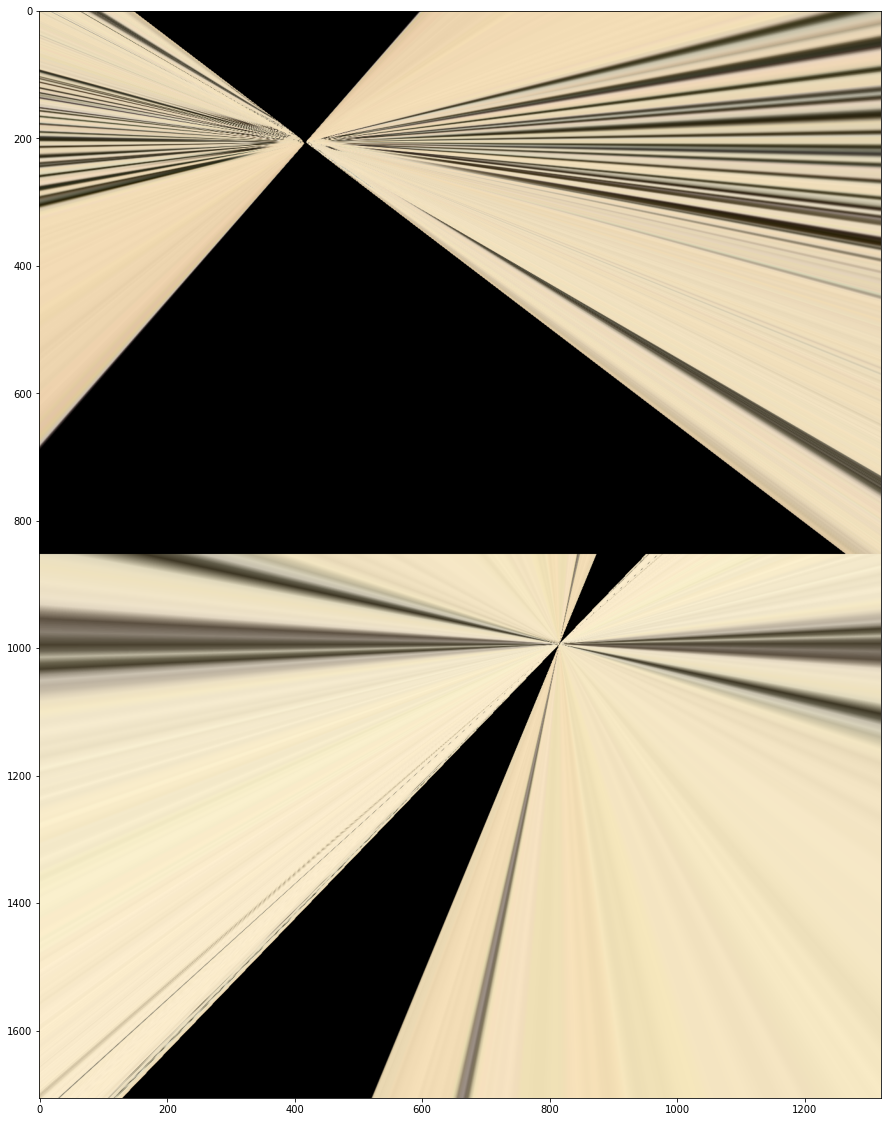

In [16]:
mostrarImagen(ficheroPNG)


In [ ]:
#Localizamos y mostramos en la imagen los campos que queremos leer:
clone = ficheroPNG.copy()
cv2.rectangle(clone, (940, 190), (1250, 220), (0, 255, 0), 2) #Termino municipal de
cv2.rectangle(clone, (380, 230), (680, 265), (0, 255, 0), 2) #Partido judicial de

cv2.rectangle(clone, (1170, 40), (1330, 70), (0, 255, 0), 2) #Hoja catastral número
cv2.rectangle(clone, (1170, 70), (1330, 100), (0, 255, 0), 2) #número de la parcela
cv2.rectangle(clone, (1170, 100), (1330, 130), (0, 255, 0), 2) #idem del poligono topográfico
cv2.rectangle(clone, (1170, 130), (1330, 160), (0, 255, 0), 2) #idem de la fotografía

cv2.rectangle(clone, (295, 470), (755, 505), (0, 255, 0), 2) #Propietario1
cv2.rectangle(clone, (295, 505), (755, 548), (0, 255, 0), 2) #Propietario2
cv2.rectangle(clone, (295, 548), (755, 585), (0, 255, 0), 2) #Propietario3


mostrarImagen(clone)